# Geopandas in Colabatory

##安裝 x 讀資料 x 出圖

先用 pip 安裝 geopandas

In [6]:
pip install geopandas

     |████████████████████████████████| 972kB 5.5MB/s 
     |████████████████████████████████| 6.5MB 12.2MB/s 
     |████████████████████████████████| 14.8MB 329kB/s 


連結到google drive

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


將google drive內資料夾讀進來


In [8]:
import geopandas as gpd
gdf_Rail=gpd.read_file('/content/gdrive/My Drive/大三上/計算機程式/Try/Rail/RAIL_1091104.shp',encoding='utf-8')
gdf_Rail

#讀 google檔案進來 https://ithelp.ithome.com.tw/articles/10217962

,RAILID,RAILNAME,RAILTYPE,MDATE,SOURCE,DEFINITION,geometry
0,O0000000006,臺鐵內灣線,1,201905,0,0,"LINESTRING (252762.399 2741652.649, 252762.087..."
1,O0000000011,臺鐵內灣線,1,201905,0,0,"LINESTRING (250940.431 2744091.128, 250863.411..."
2,O0000000012,臺鐵內灣線,2,201905,0,0,"LINESTRING (251727.555 2743487.347, 251613.940..."
3,O0000000020,臺鐵縱貫線(北段),1,201906,0,0,"LINESTRING (240066.132 2737224.053, 240068.939..."
4,O0000000018,臺鐵縱貫線(北段),1,201906,0,0,"LINESTRING (241236.494 2739351.408, 241241.607..."
...,...,...,...,...,...,...,...
1329,J0000000128,臺鐵內灣線,5,202001,0,1,"LINESTRING (268030.522 2733421.343, 268019.109..."
1330,J0000000129,臺鐵內灣線,5,202001,0,1,"LINESTRING (265388.638 2734406.508, 265390.236..."
1331,J0000000130,臺鐵內灣線,5,202001,0,1,"LINESTRING (264095.882 2734617.202, 264069.203..."
1332,J0000000131,臺鐵內灣線,1,202001,0,0,"LINESTRING (252827.664 2741641.508, 252827.147..."


將資料畫出來

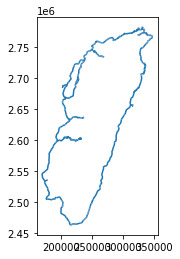

In [9]:
gdf_Rail.plot()

## 點分析

In [10]:
# 畫出 MRT Station (點分析)

import geopandas as gpd
MRT=gpd.read_file('/content/gdrive/My Drive/大三上/計算機程式/Try/MRT/A190010173V002.shp',encoding='utf-8')
MRT

,StationUID,StationID,Zh_tw,En,PositionLa,PositionLo,StationAdd,BikeAllowO,SrcUpdateT,UpdateTime,UniqueID,geometry
0,TRTC-BR01,BR01,動物園,Taipei Zoo,24.998205,121.579501,11656臺北市文山區新光路2段32號,0,2018-01-10T13:00:00+08:00,2018-07-25T10:00:00+08:00,A190010173V002,POINT (121.57950 24.99821)
1,TRTC-BR02,BR02,木柵,Muzha,24.998240,121.573127,11656臺北市文山區木柵路4段135號,0,2018-01-10T13:00:00+08:00,2018-07-25T10:00:00+08:00,A190010173V002,POINT (121.57313 24.99824)
2,TRTC-BR03,BR03,萬芳社區,Wanfang Community,24.998570,121.568088,11653臺北市文山區萬芳路60號,0,2018-01-10T13:00:00+08:00,2018-07-25T10:00:00+08:00,A190010173V002,POINT (121.56809 24.99857)
3,TRTC-BR04,BR04,萬芳醫院,Wanfang Hospital,24.999320,121.558092,11696臺北市文山區興隆路3段113號,0,2018-01-10T13:00:00+08:00,2018-07-25T10:00:00+08:00,A190010173V002,POINT (121.55809 24.99932)
4,TRTC-BR05,BR05,辛亥,Xinhai,25.005455,121.557046,11694臺北市文山區辛亥路4段128號,0,2018-01-10T13:00:00+08:00,2018-07-25T10:00:00+08:00,A190010173V002,POINT (121.55705 25.00546)
...,...,...,...,...,...,...,...,...,...,...,...,...
116,TRTC-BL19,BL19,永春,Yongchun,25.040855,121.576200,11061臺北市信義區忠孝東路5段455號,1,2018-01-10T13:00:00+08:00,2018-07-25T10:00:00+08:00,A190010173V002,POINT (121.57620 25.04086)
117,TRTC-BL20,BL20,後山埤,Houshanpi,25.044715,121.582270,11575臺北市南港區忠孝東路6段2號,1,2018-01-10T13:00:00+08:00,2018-07-25T10:00:00+08:00,A190010173V002,POINT (121.58227 25.04472)
118,TRTC-BL21,BL21,昆陽,Kunyang,25.050459,121.593228,11558臺北市南港區忠孝東路6段451號,1,2018-01-10T13:00:00+08:00,2018-07-25T10:00:00+08:00,A190010173V002,POINT (121.59323 25.05046)
119,TRTC-BL22,BL22,南港,Nangang,25.052035,121.606970,11561臺北市南港區忠孝東路7段380號,1,2018-01-10T13:00:00+08:00,2018-07-25T10:00:00+08:00,A190010173V002,POINT (121.60697 25.05204)


In [11]:
type(MRT)

geopandas.geodataframe.GeoDataFrame

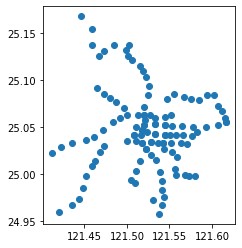

In [ ]:
MRT.plot()

## 線分析

https://medium.com/datainpoint/python-essentials-requesting-web-api-edd417a57ba5

In [ ]:
pip install -U requests lxml pandas

     |████████████████████████████████| 61kB 3.3MB/s 
     |████████████████████████████████| 5.5MB 7.2MB/s 
Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (1.1.5)
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import requests

r = requests.get("https://gist.motc.gov.tw/gist_api/V3/Map/Rail/Network/Line/OperatorCode/TRTC?$format=GEOJSON", verify=False)
print(r.status_code)

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


200


In [2]:
import requests

r = requests.get("https://gist.motc.gov.tw/gist_api/V3/Map/Rail/Network/Line/OperatorCode/TRTC?$format=JSON", verify=False)
list_of_dicts = r.json()
print(type(r))
print(type(list_of_dicts))

for i in list_of_dicts:
    print(i)

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


<class 'requests.models.Response'>
<class 'list'>
{'LineID': 'R', 'LineName': '新北投線', 'Geometry': 'MULTILINESTRING ((121.49865613400004 25.131801376000055, 121.49900144600008 25.131376423000063, 121.4994429730001 25.130819712000061, 121.49980305400004 25.130353548000073, 121.49997500800009 25.130113726000047, 121.50006865600005 25.129973474000053, 121.50012099000003 25.129887535000023, 121.50020282000003 25.12974054700004, 121.50027414600004 25.129600369000059, 121.50034263500004 25.129446667000025, 121.50039168700005 25.129315589000043, 121.50045259300009 25.12912804900003, 121.50050441000008 25.128917975000036, 121.50057634100006 25.128545320000057, 121.50067124000009 25.127955921000023, 121.50072344000012 25.127533680000056, 121.50075726400007 25.127316889000042, 121.50082668300001 25.126926166000032, 121.50125046400001 25.124832469000069, 121.50134925000009 25.12436040800003, 121.50139002500009 25.12417745700003, 121.50150741200002 25.123707598000067, 121.50157493600011 25.12347038

In [12]:
type(i)

dict

In [13]:
list(i)

['LineID', 'LineName', 'Geometry', 'UpdateDate', 'CheckDate']

## 面分析